DATA DRIVEN MARCH MADNESS Milestone 3

Christina Tenuta and Isabel Lee 

In [14]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.stats import mode
import sklearn.neighbors as knn
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib.colors as colors
import sklearn.discriminant_analysis as da
from sklearn.decomposition import PCA
from sklearn import preprocessing
%matplotlib inline
import random

In [15]:
# import detailed tourney data 
tourneydetailed = pd.read_csv('march-machine-learning-mania-2016-v2/TourneyDetailedResults.csv', delimiter = ',')
tourneydetailed.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Wfgm,Wfga,...,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19


In [16]:
# import detailed regular season data 
regulardetailed = pd.read_csv('march-machine-learning-mania-2016-v2/RegularSeasonDetailedResults.csv', delimiter = ',')
regulardetailed.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Wfgm,Wfga,...,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


In [17]:
print np.mean(tourneydetailed['Wscore'])
print np.mean(tourneydetailed['Lscore'])
print np.mean(regulardetailed['Wscore'])
print np.mean(regulardetailed['Lscore'])
print np.mean(tourneydetailed['Wpf'])
print np.mean(tourneydetailed['Lpf'])
print np.mean(regulardetailed['Wpf'])
print np.mean(regulardetailed['Lpf'])

74.4769775679
63.1440377804
74.7205682121
62.7527126233
16.4132231405
19.0838252656
17.4770988616
19.8678289187


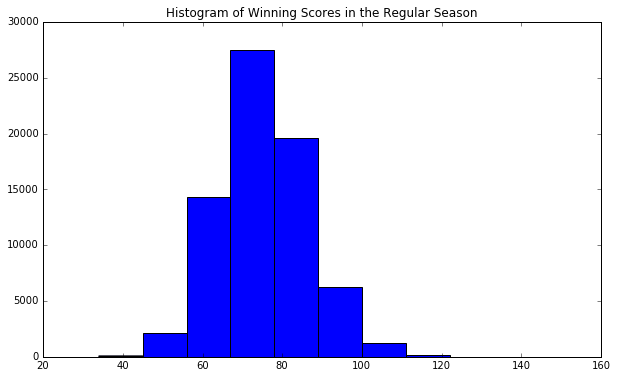

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.hist(regulardetailed['Wscore'])

ax.set_title('Histogram of Winning Scores in the Regular Season')

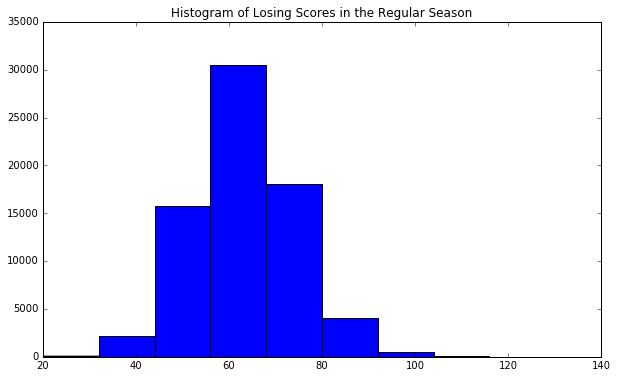

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.hist(regulardetailed['Lscore'])

ax.set_title('Histogram of Losing Scores in the Regular Season')

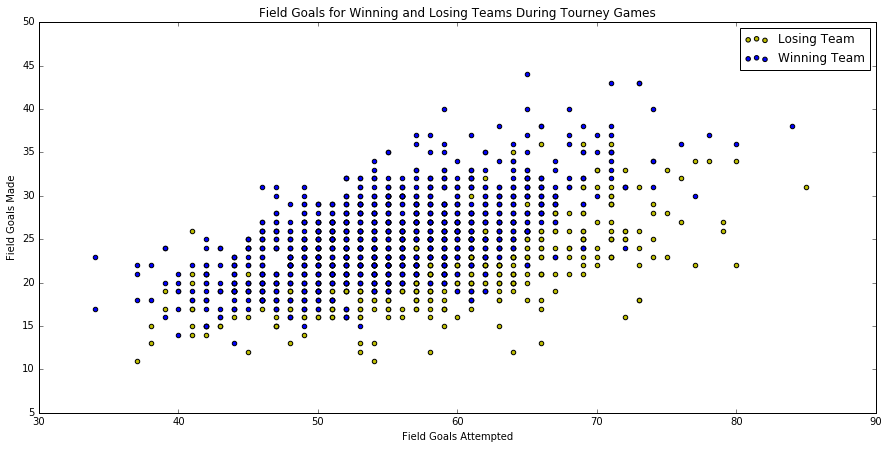

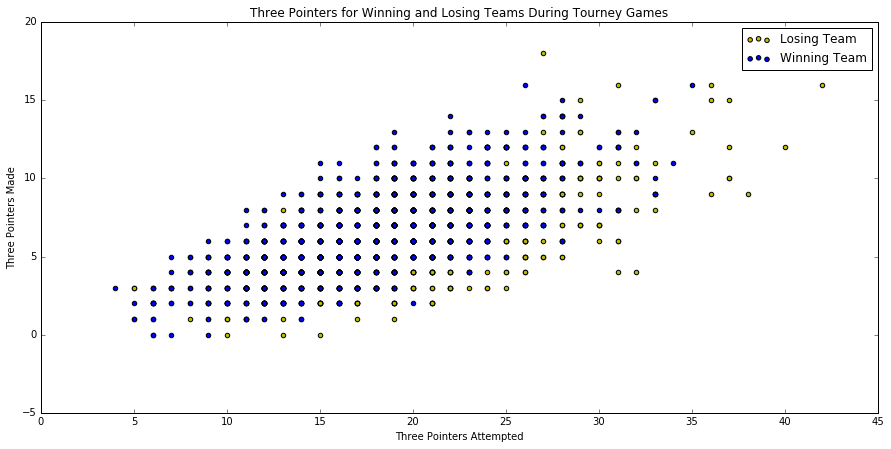

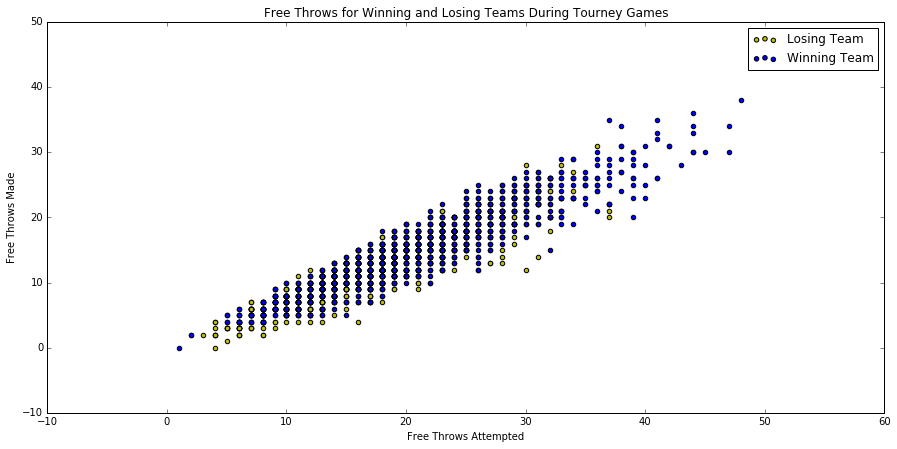

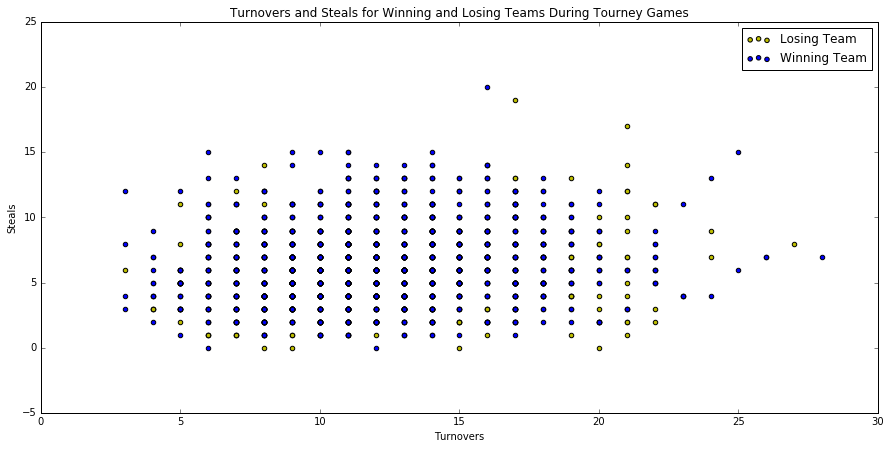

In [20]:
# Plot graphs to see what stats are most important to winning tourney games. If we know what 
# stats are most important we can find what affects those spacific stats 
# plot FG made vs attempted 
plt.figure(figsize=(15,7))
plt.scatter(tourneydetailed['Lfga'], tourneydetailed['Lfgm'], c = 'y', label = 'Losing Team')
plt.scatter(tourneydetailed['Wfga'], tourneydetailed['Wfgm'], c = 'b', label = 'Winning Team')
plt.xlabel('Field Goals Attempted')
plt.ylabel('Field Goals Made')
plt.legend()
plt.title('Field Goals for Winning and Losing Teams During Tourney Games')
plt.show()

#plot TP made vs attempted 
plt.figure(figsize=(15,7))
plt.scatter(tourneydetailed['Lfga3'], tourneydetailed['Lfgm3'], c = 'y', label = 'Losing Team')
plt.scatter(tourneydetailed['Wfga3'], tourneydetailed['Wfgm3'], c = 'b', label = 'Winning Team')
plt.xlabel('Three Pointers Attempted')
plt.ylabel('Three Pointers Made')
plt.legend()
plt.title('Three Pointers for Winning and Losing Teams During Tourney Games')
plt.show()

# plot FT made vs attempted 
plt.figure(figsize=(15,7))
plt.scatter(tourneydetailed['Lfta'], tourneydetailed['Lftm'], c = 'y', label = 'Losing Team')
plt.scatter(tourneydetailed['Wfta'], tourneydetailed['Wftm'], c = 'b', label = 'Winning Team')
plt.xlabel('Free Throws Attempted')
plt.ylabel('Free Throws Made')
plt.legend()
plt.title('Free Throws for Winning and Losing Teams During Tourney Games')
plt.show()

# plot turnovers and steals 
plt.figure(figsize=(15,7))
plt.scatter(tourneydetailed['Lto'], tourneydetailed['Lstl'], c = 'y', label = 'Losing Team')
plt.scatter(tourneydetailed['Wto'], tourneydetailed['Wstl'], c = 'b', label = 'Winning Team')
plt.xlabel('Turnovers')
plt.ylabel('Steals')
plt.legend()
plt.title('Turnovers and Steals for Winning and Losing Teams During Tourney Games')
plt.show()

In [21]:
#find FG, TP, and FT percentages for all teams in tourney 
tourneydetailed['wfg%'] = tourneydetailed['Wfgm']/tourneydetailed['Wfga']
tourneydetailed['wtp%'] = tourneydetailed['Wfgm3']/tourneydetailed['Wfga3']
tourneydetailed['wft%'] = tourneydetailed['Wftm']/tourneydetailed['Wfta']
tourneydetailed['lfg%'] = tourneydetailed['Lfgm']/tourneydetailed['Lfga']
tourneydetailed['ltp%'] = tourneydetailed['Lfgm3']/tourneydetailed['Lfga3']
tourneydetailed['lft%'] = tourneydetailed['Lftm']/tourneydetailed['Lfta']

tourneydetailed.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Wfgm,Wfga,...,Lto,Lstl,Lblk,Lpf,wfg%,wtp%,wft%,lfg%,ltp%,lft%
0,2003,134,1421,92,1411,84,N,1,32,69,...,15,5,0,22,0.463768,0.379310,0.653846,0.432836,0.387097,0.451613
1,2003,136,1112,80,1436,51,N,0,31,66,...,17,10,3,15,0.469697,0.304348,0.785714,0.312500,0.250000,1.000000
2,2003,136,1113,84,1272,71,N,0,31,59,...,12,2,5,18,0.525424,0.428571,0.727273,0.362319,0.250000,0.666667
3,2003,136,1141,79,1166,73,N,0,29,53,...,21,6,6,21,0.547170,0.428571,0.720000,0.450000,0.411765,0.705882
4,2003,136,1143,76,1301,74,N,1,27,64,...,14,5,8,19,0.421875,0.350000,0.652174,0.446429,0.428571,0.750000


In [22]:
#find FG, TP, and FT percentages for all teams in regular season 
regulardetailed['wfg%'] = regulardetailed['Wfgm']/regulardetailed['Wfga']
regulardetailed['wtp%'] = regulardetailed['Wfgm3']/regulardetailed['Wfga3']
regulardetailed['wft%'] = regulardetailed['Wftm']/regulardetailed['Wfta']
regulardetailed['lfg%'] = regulardetailed['Lfgm']/regulardetailed['Lfga']
regulardetailed['ltp%'] = regulardetailed['Lfgm3']/regulardetailed['Lfga3']
regulardetailed['lft%'] = regulardetailed['Lftm']/regulardetailed['Lfta']

regulardetailed.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Wfgm,Wfga,...,Lto,Lstl,Lblk,Lpf,wfg%,wtp%,wft%,lfg%,ltp%,lft%
0,2003,10,1104,68,1328,62,N,0,27,58,...,18,9,2,20,0.465517,0.214286,0.611111,0.415094,0.200000,0.727273
1,2003,10,1272,70,1393,63,N,0,26,62,...,12,8,6,16,0.419355,0.400000,0.526316,0.358209,0.250000,0.450000
2,2003,11,1266,73,1437,61,N,0,24,58,...,12,2,5,23,0.413793,0.444444,0.586207,0.301370,0.115385,0.608696
3,2003,11,1296,56,1457,50,N,0,18,38,...,19,4,3,23,0.473684,0.333333,0.548387,0.367347,0.272727,0.533333
4,2003,11,1400,77,1208,71,N,0,30,61,...,10,7,1,14,0.491803,0.428571,0.846154,0.387097,0.375000,0.629630


In [24]:
# percentage of games won in normal season vs number of games won in tourney in 2015
teams = pd.read_csv('march-machine-learning-mania-2016-v2/Teams.csv', delimiter = ',')
regulargames = pd.read_csv('march-machine-learning-mania-2016-v2/RegularSeasonCompactResults.csv', delimiter = ',')
regulargames2015 = regulargames[regulargames['Season'] == 2015]

#number of wins / total games 
seasongames = pd.DataFrame(columns = ['Team', 'TeamID', 'Wins', 'Losses', 'TotalGames'])

for i in range(len(teams)):
    wins = regulargames2015[regulargames2015['Wteam'] == teams.iloc[i, 0]]
    num_wins = wins.shape[0]
    losses = regulargames2015[regulargames2015['Lteam'] == teams.iloc[i, 0]]
    num_losses = losses.shape[0]
    total_games = num_wins + num_losses
    
    seasongames.loc[i] = ([teams.iloc[i, 1], teams.iloc[i, 0], num_wins, num_losses, total_games])
    
#number of games won in tourney / total games
tourneygames = pd.read_csv('march-machine-learning-mania-2016-v2/TourneyCompactResults.csv', delimiter = ',')
tourneygames2015 = tourneygames[tourneygames['Season'] == 2015]

tourneygames = pd.DataFrame(columns = ['Team', 'TeamID', 'Wins', 'Losses', 'TotalGames'])

#find wins, losses, and total games in 2015 tourney 
for i in range(len(teams)):
    wins = tourneygames2015[tourneygames2015['Wteam'] == teams.iloc[i, 0]]
    num_wins = wins.shape[0]
    losses = tourneygames2015[tourneygames2015['Lteam'] == teams.iloc[i, 0]]
    num_losses = losses.shape[0]
    total_games = num_wins + num_losses
    
    tourneygames.loc[i] = ([teams.iloc[i, 1], teams.iloc[i, 0], num_wins, num_losses, total_games])
    
teamsintourney = tourneygames[tourneygames['TotalGames'] > 0]
index = teamsintourney.index.tolist()
teamsintourney_season = seasongames.iloc[index, :]

teamsintourney.head()

,Team,TeamID,Wins,Losses,TotalGames
6,Albany NY,1107.0,0.0,1.0,1.0
11,Arizona,1112.0,3.0,1.0,4.0
15,Arkansas,1116.0,1.0,1.0,2.0
23,Baylor,1124.0,0.0,1.0,1.0
24,Belmont,1125.0,0.0,1.0,1.0


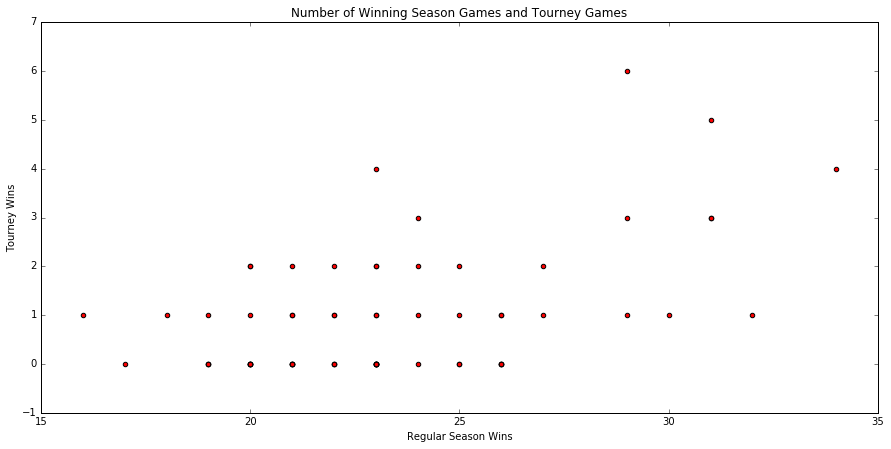

In [25]:
#plot
plt.figure(figsize=(15,7))
plt.scatter(teamsintourney_season['Wins'], teamsintourney['Wins'], c = 'r')
plt.xlabel('Regular Season Wins')
plt.ylabel('Tourney Wins')
plt.title('Number of Winning Season Games and Tourney Games')
plt.show()

In [26]:
regulargames2015det = regulardetailed[regulardetailed['Season'] == 2015]

#average percentages 
seasonshots = pd.DataFrame(columns = ['Team', 'TeamID', 'fg%', 'tp%', 'ft%'])

#find FT, FG, and TP percentages vs number of games won 
for i in range(len(index)):
    W = regulargames2015det[regulargames2015det['Wteam'] == teams.iloc[index[i], 0]]
    L = regulargames2015det[regulargames2015det['Lteam'] == teams.iloc[index[i], 0]]
    
    fg = float(W['Wfgm'].sum() + L['Lfgm'].sum())
    fga = float(W['Wfga'].sum() + L['Lfga'].sum())
    FG_PERCENT = fg/ fga
    
    tp = float(W['Wfgm3'].sum() + L['Lfgm3'].sum())
    tpa = float(W['Wfga3'].sum() + L['Lfga3'].sum())
    TP_PERCENT = tp/ tpa
    
    ft = float(W['Wftm'].sum() + L['Lftm'].sum())
    fta = float(W['Wfta'].sum() + L['Lfta'].sum())
    FT_PERCENT = ft/ fta
    
    seasonshots.loc[i] = ([teams.iloc[index[i], 1], teams.iloc[index[i], 0], FG_PERCENT, TP_PERCENT, FT_PERCENT])

seasonshots.head()

,Team,TeamID,fg%,tp%,ft%
0,Albany NY,1107.0,0.439875,0.360146,0.760938
1,Arizona,1112.0,0.489488,0.359833,0.699085
2,Arkansas,1116.0,0.447432,0.350309,0.724227
3,Baylor,1124.0,0.433994,0.382253,0.666667
4,Belmont,1125.0,0.474184,0.378713,0.690090


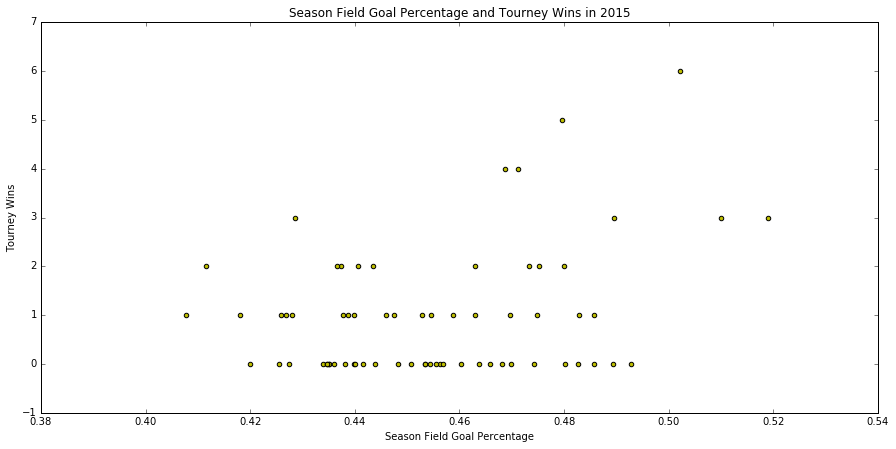

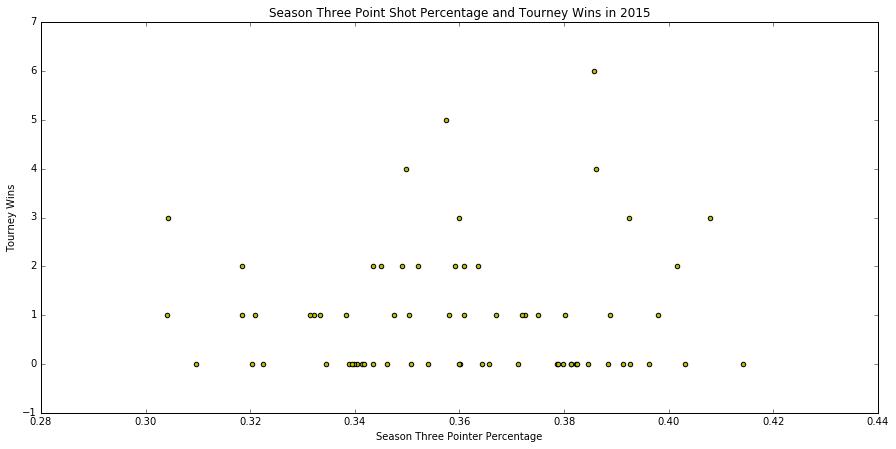

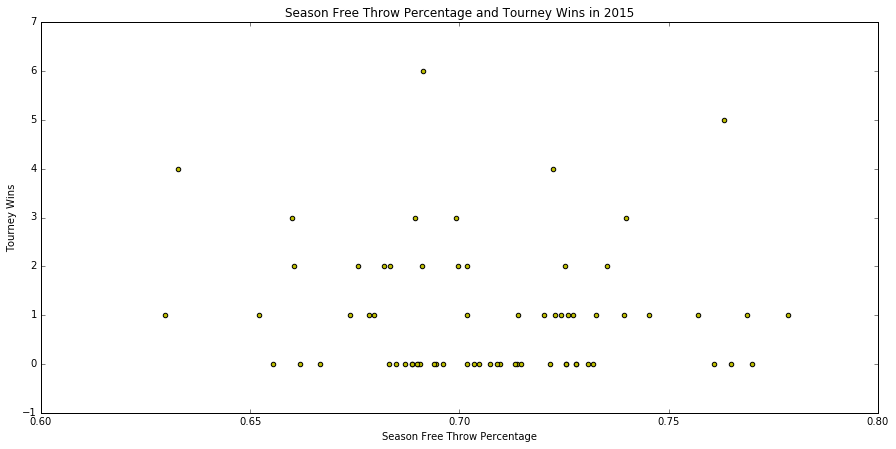

In [27]:
#plot
plt.figure(figsize=(15,7))
plt.scatter(seasonshots['fg%'], teamsintourney['Wins'], c = 'y')
plt.xlabel('Season Field Goal Percentage')
plt.ylabel('Tourney Wins')
plt.title('Season Field Goal Percentage and Tourney Wins in 2015')
plt.show()

plt.figure(figsize=(15,7))
plt.scatter(seasonshots['tp%'], teamsintourney['Wins'], c = 'y')
plt.xlabel('Season Three Pointer Percentage')
plt.ylabel('Tourney Wins')
plt.title('Season Three Point Shot Percentage and Tourney Wins in 2015')
plt.show()

plt.figure(figsize=(15,7))
plt.scatter(seasonshots['ft%'], teamsintourney['Wins'], c = 'y')
plt.xlabel('Season Free Throw Percentage')
plt.ylabel('Tourney Wins')
plt.title('Season Free Throw Percentage and Tourney Wins in 2015')
plt.show()


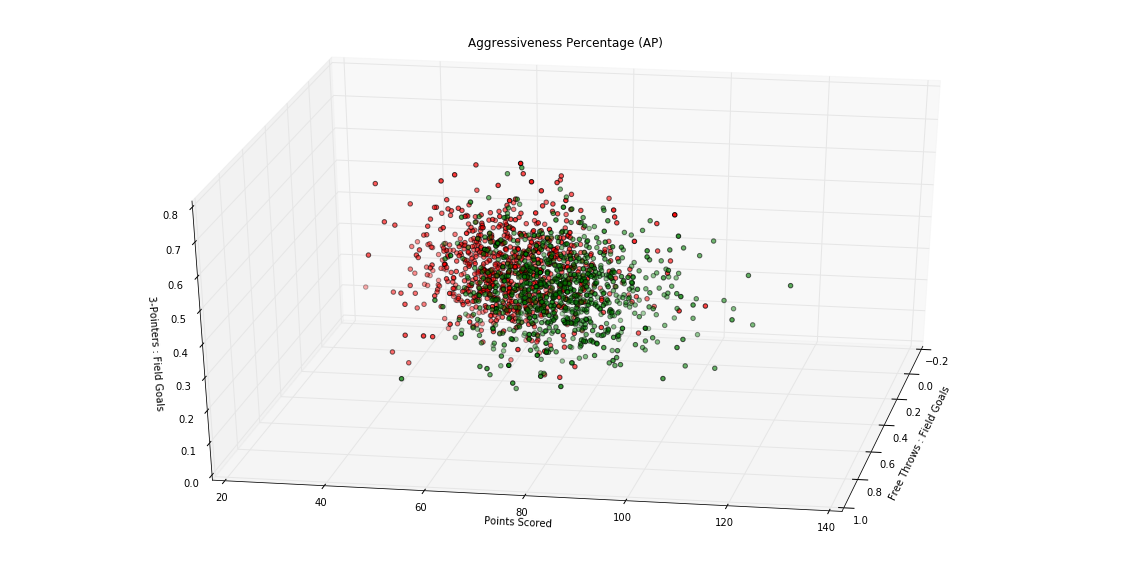

In [28]:
#Aggression?
w_ft_fg = (tourneydetailed['Wfta'].values*.75) / tourneydetailed['Wfga'].values 
w_tp_fg = (tourneydetailed['Wfga3'].values*1.0) / tourneydetailed['Wfga'].values

l_ft_fg = (tourneydetailed['Lfta'].values*.75) / tourneydetailed['Lfga'].values
l_tp_fg = (tourneydetailed['Lfga3'].values*1.0) / tourneydetailed['Lfga'].values

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

ax.set_title('Aggressiveness Percentage (AP)')
ax.scatter(w_ft_fg, tourneydetailed['Wscore'], w_tp_fg, c='g')
ax.scatter(l_ft_fg, tourneydetailed['Lscore'], l_tp_fg, c='r')
ax.set_xlabel('Free Throws : Field Goals')
ax.set_ylabel('Points Scored')
ax.set_zlabel('3-Pointers : Field Goals')
ax.view_init(azim=10)



In [29]:
# correlation matrix for wins
print "Correlation matrix for wins"
print(np.corrcoef((w_ft_fg, tourneydetailed['Wscore'], w_tp_fg)))

# matrix for wins
print "Correlation matrix for losses"
print(np.corrcoef((l_ft_fg, tourneydetailed['Lscore'], l_tp_fg)))

Correlation matrix for wins
[[  1.00000000e+00   9.78861793e-02  -1.18648094e-04]
 [  9.78861793e-02   1.00000000e+00  -6.99666766e-02]
 [ -1.18648094e-04  -6.99666766e-02   1.00000000e+00]]
Correlation matrix for losses
[[ 1.          0.22417445 -0.05813483]
 [ 0.22417445  1.          0.01684536]
 [-0.05813483  0.01684536  1.        ]]


To begin, we started with loading in our data and computing some summary statistics. At first glance of a couple summary statistics, we noticed that there is not a significant difference between tournament scores for winning and loosing teams. Thus, we are hypothesizing that it is reasonable to use the regular season details in order to predict tournament game outcomes. <br></br> <br></br>
Next, looking at the distribution of point scores across all winning teams during the regular season, we can see that this distribution is fairly normal. Additionally, the distribution of losing scores follows a similar result.  The fact that these distributions are normally distributed is helpful because should we decide to linearly regress the data, we can construct confidence intervals and hypothesis tests. <br></br> <br></br>
After, we tried creating some visualizations that would help us decide what game actions were most important in leading a team to win. For example, are three pointers or free throws better indicators of a winning team and is it more important for a team to be more accurate or to make more attempts? We plotted shots made vs shots attempted for field goals, three pointers, and free throws and found that winning and losing teams have about the same percentage of free throw accuracy, but winning teams perform with an overall higher accuracy during the tournament. <br></br> <br></br>
We then explored the relationship between the number of regular season winning games and the number of tourney game wins a team has. There appears to be some sort of relationship where winning a larger number of regular season is correlated with success in the tournament. While this relationship might seem obvious, the graph shows that there are a number of outliers and that winning a comparatively small number of season games does not necessarily mean that a team will win no games in the tournament. We are interested to look into these outliers and see what other factors lead to their success such as what league they may come from or what their aggressiveness level is. <br></br> <br></br>
Next, we looked to see if there was a relationship between percentage of any specific type of shot made during the season correlated with success in the tourney and surprisingly found that there wasn’t much of a relationship that could be seen on the graph. This is a shocking finding for us and is something we need to look more into. We assumed that each team’s skill level would be evident in their shooting percentages and that if skill translated into tourney wins, then higher shooting percentages would translate into tourney wins. <br></br> <br></br>
Lastly, we explored the relationship between points scored, three pointers to field goals ratio, and free throws to field goals ratio. In other words, we were looking at how the aggressiveness of each team affects the number of points scored in tournament games. Looking at the correlation matrix for these 3 factors, we see that on winning teams, free throws to field goals ratio correlation to points scored is weaker than it is on losing team. On winning teams, three pointers to free throws ratio to points is more negatively correlated than on losing teams. 
